In [1]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt

In [ ]:



img_height, img_width = 224, 224
batch_size = 32

train_dir = 'C:/Users/yousi/OneDrive/Desktop/CV-TASKS-main/Dataset/train'
test_dir = 'C:/Users/yousi/OneDrive/Desktop/CV-TASKS-main/Dataset/test'

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2

)

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2

)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True,
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=True,
)

Found 3208 images belonging to 2 classes.
Found 708 images belonging to 2 classes.


In [4]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width,img_height,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


c:\Users\yousi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:


def extract_features(generator, max_steps=None):
    features = []
    labels = []
    steps = max_steps if max_steps else len(generator)
    for _ in range(steps):
        X, y = next(generator)
        batch_features = model.predict(X)
        features.append(batch_features)
        labels.append(y)
    return np.concatenate(features), np.concatenate(labels)


def extract_features_single_image(x,y):
    features = []
    labels = []
    batch_features = model.predict(x)
    features.append(batch_features)
    labels.append(y)
    return np.concatenate(features), np.concatenate(labels)



In [6]:

max_steps = None 

In [7]:
X_train, Y_train = extract_features(train_generator, max_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [8]:

X_test, Y_test = extract_features(test_generator,max_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [9]:

knn = KNeighborsClassifier(n_neighbors=2)  
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [10]:

y_pred = knn.predict(X_test)

score =accuracy_score(Y_test, y_pred)
print("Accuracy:", score)

Accuracy: 0.7288135593220338


In [11]:

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.73      0.72       345
         1.0       0.74      0.73      0.73       363

    accuracy                           0.73       708
   macro avg       0.73      0.73      0.73       708
weighted avg       0.73      0.73      0.73       708



In [12]:
joblib.dump(knn, 'knn.pkl')

['knn.pkl']

In [13]:
knn_loaded = joblib.load('knn.pkl')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


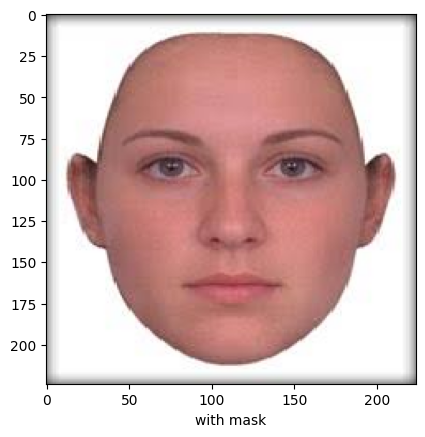

In [16]:


random_image, random_label = next(test_generator)


x ,y = extract_features_single_image(random_image,random_label)

prediction = knn_loaded.predict(x)

count = np.count_nonzero(prediction == 1)

cond = count> len(prediction) /2 

result = 'without mask' if cond else 'with mask'

plt.imshow(random_image[0]) 
plt.xlabel(result)
plt.show()
